## 2D Isotropic Quantum Harmonic Oscillator - Dynamic Simulation
### Case 2.4 - Gaussian Wave Function

<br>
Dynamic simulation of the wave function given by the initial gaussian pulse

$$ \Psi(\mathbf{r},0) = A \exp \left[ - \frac{(x-s)^2}{s^2} \right] \exp \left[ - \frac{(y+1.5s)^2}{(3s/5)^2} \right] \exp \left[ \mathrm{i} \frac{2\pi}{s} \left( \frac{1}{3} x + \frac{1}{4} y \right) \right] $$

from time $t = 0$ to time  $t = T = 2 \pi / \omega$ .

This notebook contains graphs of:
* the reconstruction of the initial probability density function $|\Psi(\mathbf{r},0)|$ ,
* the probability amplitudes $|c_{n_x,n_y}|^2$ of the eigenstates employed,
* the expectation value of position $\braket{\mathbf{r}}$ as a function of time.


#### Import libraries and functions


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import qho_eigen as qho
from math_tools import *


#### Initialize and reconstruct initial state $\Psi(\mathbf{r},0)$


In [2]:
# Define physical constants
hbar = 1
M = 2
w = 1
s = math.sqrt(2 * hbar / (M * w))

# Set up coordinate system
x_min = -5
x_max = 5
dx = 0.05
x = np.linspace(x_min, x_max, int((x_max - x_min) / dx) + 1) # np.linspace handles edges better

y_min = -5
y_max = 5
dy = 0.05
y = np.linspace(y_min, y_max, int((y_max - y_min) / dy) + 1) # np.linspace handles edges better

X, Y = np.meshgrid(x, y)

# Compute eigenstates
N_per_dim = 16
N = N_per_dim**2
nx = np.vstack(np.repeat(np.arange(N_per_dim), N_per_dim), dtype=object)
ny = np.vstack(np.tile(np.arange(N_per_dim), N_per_dim), dtype=object)
eigenfuns = np.zeros((N, np.size(y), np.size(x)))

print('Eigenstates computed:')

for i in range(N):
    eigenfuns[i] = qho.eigen2D_cart(s, nx[i][0], ny[i][0], X, Y)
    print(f'{i+1}', end='...')


Eigenstates computed:
1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...50...51...52...53...54...55...56...57...58...59...60...61...62...63...64...65...66...67...68...69...70...71...72...73...74...75...76...77...78...79...80...81...82...83...84...85...86...87...88...89...90...91...92...93...94...95...96...97...98...99...100...101...102...103...104...105...106...107...108...109...110...111...112...113...114...115...116...117...118...119...120...121...122...123...124...125...126...127...128...129...130...131...132...133...134...135...136...137...138...139...140...141...142...143...144...145...146...147...148...149...150...151...152...153...154...155...156...157...158...159...160...161...162...163...164...165...166...167...168...169...170...171...172...173...174...175...176...177...178...179...180...181...

In [3]:
# Initialize wave function
A = math.sqrt(10 / (3 * math.pi * s**2))
psi0 = ( A * np.exp(-(X - s)**2 / s**2) * np.exp(-(Y + 1.5 * s)**2 / (3 * s / 5)**2)
       * np.exp(1j * 2 * math.pi / s * (1/3*X + 1/4*Y)) )

# Compute eigenstate coefficients
c = np.zeros((N, 1), dtype=np.complex128)

for i in range(N):
    c[i] = np.trapz(np.trapz(np.conj(eigenfuns[i]) * psi0, x=x, axis=1), x=y)

# Reconstruct initial wave function
psi0_expand = np.sum(c[:, np.newaxis] * eigenfuns, axis=0)

# Verify normalization of probability density function
print(f'Integral of |Ψ(r,0)|² = {np.trapz(np.trapz(abs2(psi0), x=x, axis=1), x=y)}')
print()

# Compute absolute error of reconstructed state
print(f'Max abs error of reconstructed |Ψ(r,0)|² = {np.max(np.abs(abs2(psi0) - abs2(psi0_expand)))}')
print()


Integral of |Ψ(r,0)|² = 0.9999999999999991

Max abs error of reconstructed |Ψ(r,0)|² = 0.015092158017101509



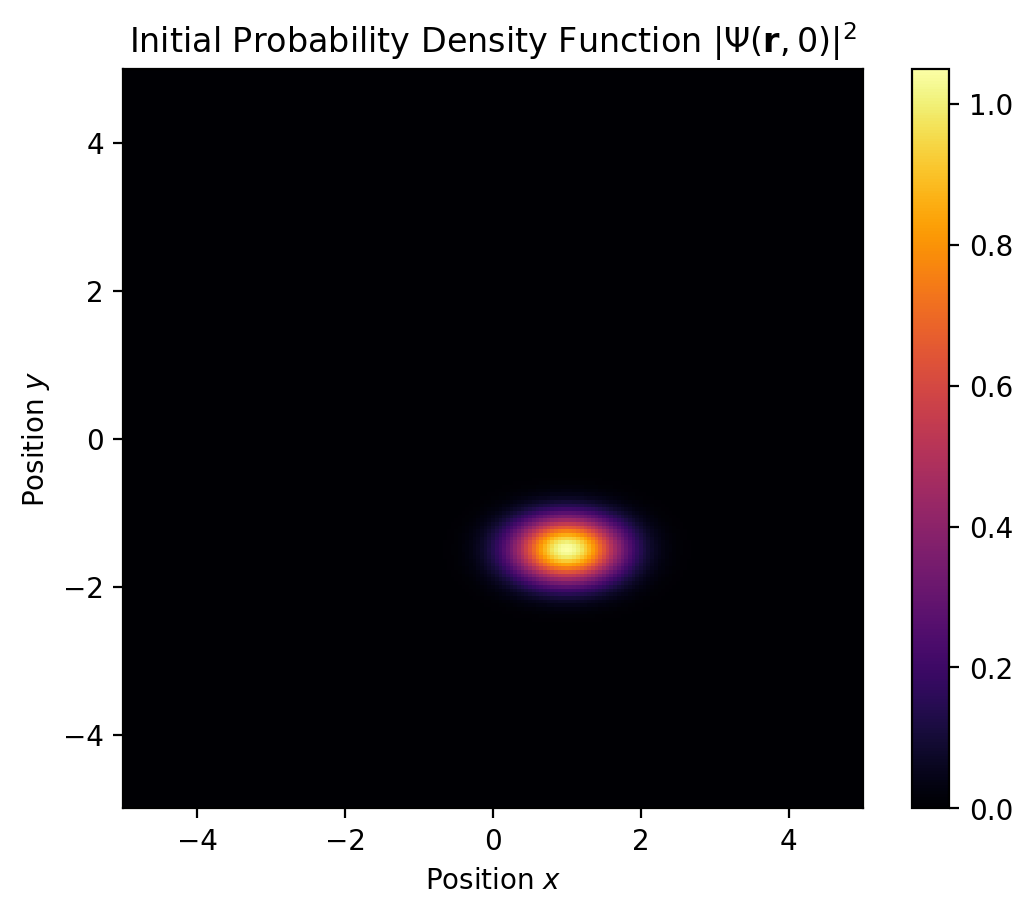

In [4]:
# Plot initial probability density function
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(x, y, abs2(psi0_expand), cmap='inferno', vmin=0)
ax.set_title(r'Initial Probability Density Function $|\Psi(\mathbf{r},0)|^2$')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(x_min, x_max), ax.set_ylim(y_min, y_max)
ax.set_aspect('equal', adjustable='box')

fig.colorbar(pcmesh, ax=ax)

plt.show()


#### Probability amplitudes $|c_{n_x,n_y}|^2$ of eigenstates


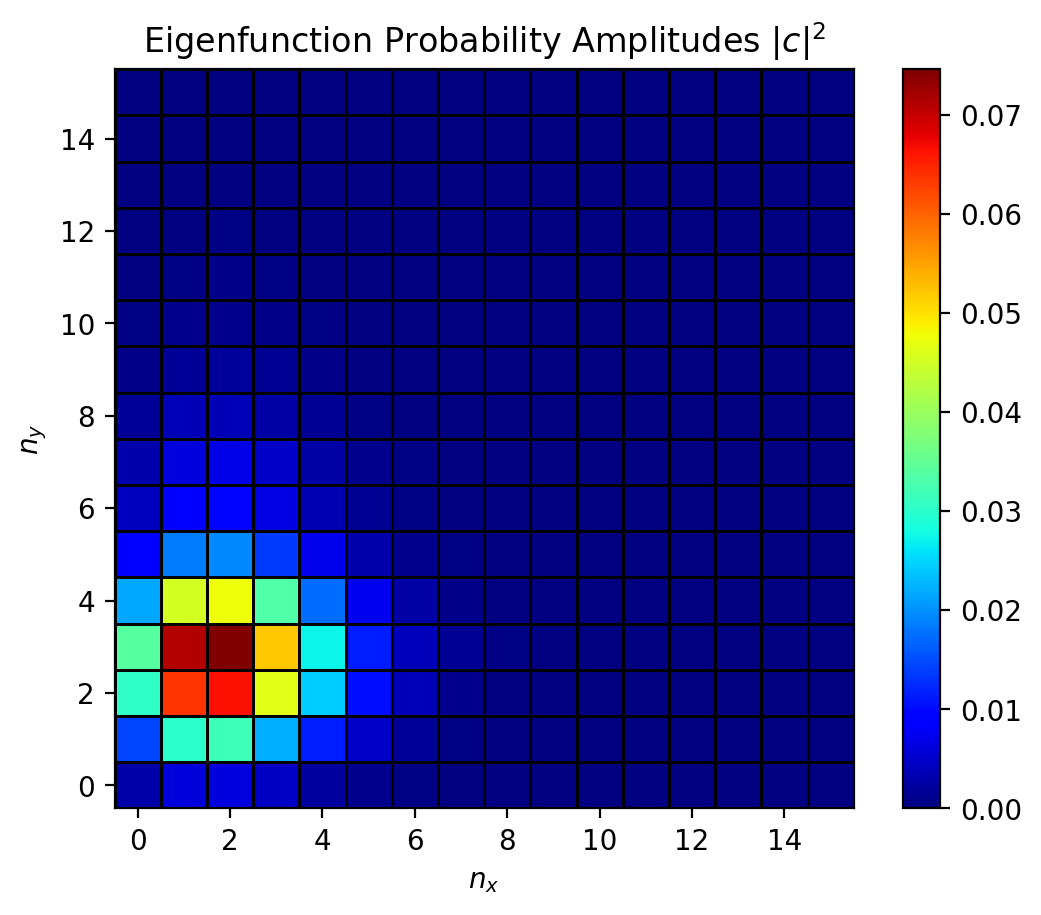

In [5]:
# Plot probability amplitudes of eigenstates
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(np.arange(N_per_dim), np.arange(N_per_dim), np.reshape(abs2(c), (N_per_dim, N_per_dim)).T,
                       cmap='jet', edgecolor='black')
ax.set_title('Eigenfunction Probability Amplitudes $|c|^2$')
ax.set_xlabel('$n_x$'), ax.set_ylabel('$n_y$')

ax.set_xticks(np.arange(0, N_per_dim, 2)), ax.set_yticks(np.arange(0, N_per_dim, 2))
ax.set_aspect('equal', adjustable='box')

fig.colorbar(pcmesh, ax=ax)

plt.show()


#### Time evolution of probability density function $|\Psi(\mathbf{r},t)|^2$


In [6]:
# Initialize time array
T = 2 * math.pi / w
t = np.linspace(0, T, 61)
dt = t[1] - t[0]

# Compute time evolution of wave function
psi = np.zeros((np.size(t), np.size(y), np.size(x)), dtype=np.complex128)
psi[0] = psi0_expand

q = (nx + ny).astype(np.float64) # Update dtype outside of for loop to speed up

print('Time step computed:')

for i in range(np.size(t) - 1):
    c_t = c * np.exp(-1j * (1 + q) * w * t[i+1])
    psi[i+1] = np.sum(c_t[:, np.newaxis] * eigenfuns, axis=0)
    print(f'{i+1}', end='...')
print()


Time step computed:
1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...50...51...52...53...54...55...56...57...58...59...60...


#### Expectation value of position $\braket{\mathbf{r}}$


In [7]:
# Compute expectation value of position components
expect_x = np.zeros(np.size(t))
expect_y = np.zeros(np.size(t))

for i in range(np.size(t)):
    expect_x[i] = np.trapz(np.trapz(X * abs2(psi[i]), x=x, axis=1), x=y)
    expect_y[i] = np.trapz(np.trapz(Y * abs2(psi[i]), x=x, axis=1), x=y)


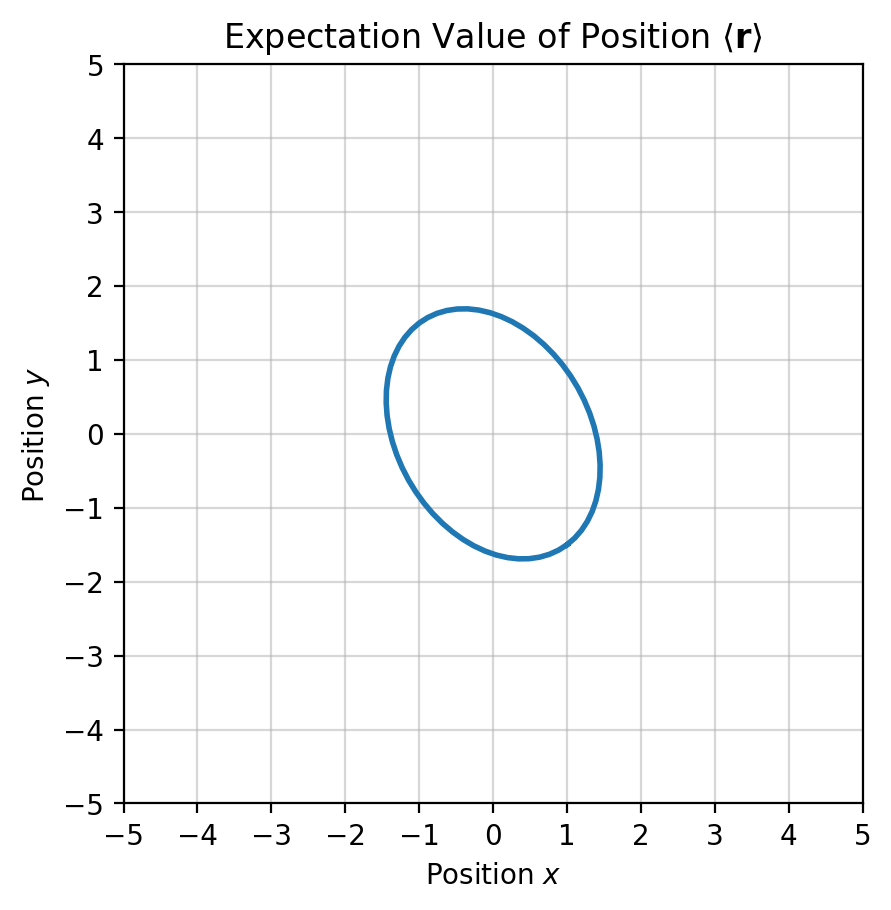

In [8]:
# PLot expectation value of position
fig, ax = plt.subplots()
ax.plot(expect_x, expect_y, linewidth=2)
ax.set_title(r'Expectation Value of Position $\langle \mathbf{r} \rangle$')
ax.set_xlabel(r'Position $x$'), ax.set_ylabel(r'Position $y$')

ax.set_xlim(x_min, x_max), ax.set_ylim(y_min, y_max)
ax.set_xticks(np.arange(-5, 6)), ax.set_yticks(np.arange(-5, 6))
ax.set_aspect('equal', adjustable='box')
ax.grid(alpha=0.5)

plt.show()


#### Expectation value of momentum $\braket{\mathbf{p}}$


In [9]:
# Compute expectation value of momentum components
grad_y, grad_x = np.gradient(psi0, y, x)
expect_px = (-1j * hbar * np.trapz(np.trapz(np.conj(psi0) * grad_x, x=x, axis=1), x=y)).real
expect_py = (-1j * hbar * np.trapz(np.trapz(np.conj(psi0) * grad_y, x=x, axis=1), x=y)).real

print(f'Expectation value of p in x = {expect_px}')
print(f'Expectation value of p in y = {expect_py}')
print()


Expectation value of p in x = 2.0879576863483034
Expectation value of p in y = 1.5637428145889825



#### Expectation value of z-component of angular momentum $\braket{L_z}$


In [10]:
# Compute expectation value of z-component of angular momentum
grad_y, grad_x = np.gradient(psi0, y, x)
expect_Lz = (-1j * hbar * np.trapz(np.trapz(np.conj(psi0) * (X * grad_y - Y * grad_x), x=x, axis=1), x=y)).real

print(f'Expectation value of L in z = {expect_Lz}')
print()


Expectation value of L in z = 4.695679344111433

